In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 준비
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes_dataset = load_diabetes()

X = diabetes_dataset['data']
y = diabetes_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
# 모델 훈련
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [4]:
# 모델 평가 1

linreg.score(X_train, y_train), linreg.score(X_test, y_test)

(0.5190341891679049, 0.4849058889476757)

In [5]:
# 모델 평가 2
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

y_train_predicted = linreg.predict(X_train)
y_test_predicted = linreg.predict(X_test)

mean_absolute_error(y_train, y_train_predicted), \
    mean_absolute_error(y_test, y_test_predicted), \
    root_mean_squared_error(y_train, y_train_predicted), \
    root_mean_squared_error(y_test, y_test_predicted)

(np.float64(44.05480373577205),
 np.float64(41.54850685988059),
 np.float64(53.91899260937753),
 np.float64(53.36956671032195))

In [6]:
# 모델 탐색
print( linreg.coef_ ) # weight
print( linreg.intercept_ ) # bias

[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
151.6651755919933


In [7]:
# 모델 저장 (파일에 저장)
import pickle

with open('models/simple-linreg.pickle', 'wb') as f:
    pickle.dump(linreg, f)

In [8]:
# 모델 읽어오기 (파일에서 읽기)
with  open('models/simple-linreg.pickle', 'rb') as f:
    linreg2 = pickle.load(f)

In [9]:
# 읽은 모델 사용
linreg2.predict(X[:5])

array([212.91986757,  71.05652681, 186.28649552, 160.13634052,
       132.79642106])

In [10]:
# Ridge 모델 훈련 (학습)

from sklearn.linear_model import Ridge

scores = []
weights = []
for a in [10, 1, 0.1, 0.01, 0.001]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    scores.append( (a, ridge.score(X_train, y_train), ridge.score(X_test, y_test)) ) # 평가 값 저장
    weights.append( (a, ridge.coef_) ) # 가중치 저장

In [11]:
scores

[(10, 0.15081869635450984, 0.1564233282092311),
 (1, 0.42730211000433205, 0.43840029731424457),
 (0.1, 0.5113994079407003, 0.4918270736855387),
 (0.01, 0.5172936105412855, 0.48705852506054115),
 (0.001, 0.5189585589174219, 0.4854389961024681)]

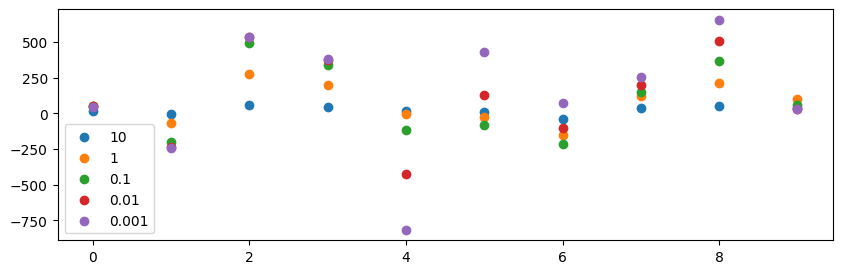

In [12]:
plt.figure(figsize=(10, 3))
for alpha, weight in weights:
    plt.scatter(np.arange(len(weight)), weight, label=str(alpha))

plt.legend()
plt.show()

In [13]:
# Lasso 모델 훈련 (학습)

from sklearn.linear_model import Lasso

scores = []
weights = []
for a in [1000, 100, 10, 1, 0.1, 0.01, 0.001]:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    scores.append( (a, lasso.score(X_train, y_train), lasso.score(X_test, y_test)) ) # 평가 값 저장
    weights.append( (a, lasso.coef_) ) # 가중치 저장

In [14]:
scores

[(1000, 0.0, -0.014016723490579253),
 (100, 0.0, -0.014016723490579253),
 (10, 0.0, -0.014016723490579253),
 (1, 0.34687336241711, 0.3791413953419158),
 (0.1, 0.507826468555518, 0.5019753487835406),
 (0.01, 0.5176658929445211, 0.4880363435126295),
 (0.001, 0.5190041207412235, 0.4853215083060125)]

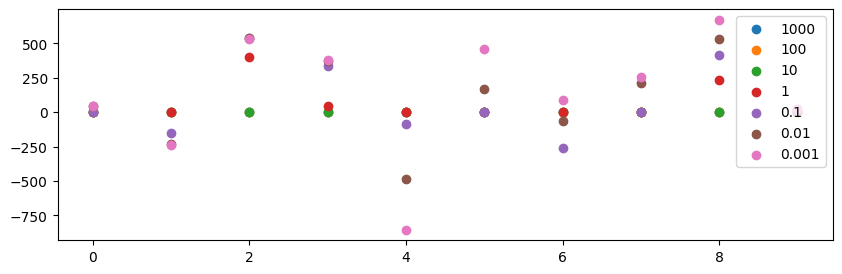

In [15]:
plt.figure(figsize=(10, 3))
for alpha, weight in weights:
    plt.scatter(np.arange(len(weight)), weight, label=str(alpha))

plt.legend()
plt.show()

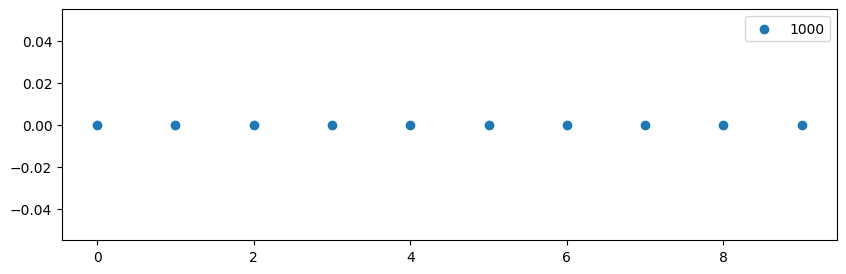

In [16]:
# 규제 1000일때의 가중치 시각화 : weights[0] 사용
plt.figure(figsize=(10, 3))
plt.scatter(np.arange(len(weights[0][1])), weights[0][1], label=str(weights[0][0]))
plt.legend()
plt.show()